# Análise de dados - Enem 2021

## Apresentação 

<div align='justify'>

O Exame Nacional do Ensino Médio (Enem) foi instituído em 1998, com o objetivo de avaliar o desempenho escolar dos estudantes ao término da educação básica. Em 2009, o exame aperfeiçoou sua metodologia e passou a ser utilizado como mecanismo de acesso à educação superior. Desde 2020, o participante pode escolher entre fazer o exame impresso ou o Enem Digital, com provas aplicadas em computadores, em locais de prova definidos pelo Inep. <br>

As notas do Enem podem ser usadas para acesso ao Sistema de Seleção Unificada (Sisu) e ao Programa Universidade para Todos (ProUni). Elas também são aceitas em mais de 50 instituições de educação superior portuguesas. Além disso, os participantes do Enem podem pleitear financiamento estudantil em programas do governo, como o Fundo de Financiamento Estudantil (Fies). Os resultados do Enem possibilitam, ainda, o desenvolvimento de estudos e indicadores educacionais. <br>

Qualquer pessoa que já concluiu o ensino médio ou está concluindo a etapa pode fazer o Enem para acesso à educação superior. Os participantes que ainda não concluíram o ensino médio podem participar como “treineiros” e seus resultados no exame servem somente para autoavaliação de conhecimentos. <br>

A aplicação do Enem ocorre em dois dias. A Política de Acessibilidade e Inclusão do Inep garante atendimento especializado e tratamento pelo nome social, além de diversos recursos de acessibilidade. Há também uma aplicação para pessoas privadas de liberdade. <br>

Os participantes fazem provas de quatro áreas de conhecimento: linguagens, códigos e suas tecnologias; ciências humanas e suas tecnologias; ciências da natureza e suas tecnologias; e matemática e suas tecnologias, que ao todo somam 180 questões objetivas. Os participantes também são avaliados por meio de uma redação, que exige o desenvolvimento de um texto dissertativo-argumentativo a partir de uma situação-problema. <br> </div>


## Importando as principais bibliotecas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Além de importar as bibliotecas, vamos ajustar o Pandas para que seja capaz de exibir todas as features do dataframe
pd.set_option("display.max_rows", 100)

### Coletando os dados

<div align='justify'>

Os microdados de todas as provas do ENEM de 1998 até 2021 podem ser obtidos através deste  [link](https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/microdados/enem).

A partir deste link, foram baixados os dados relacionados ao ENEM 2021. 
Ao descompactar o arquivo baixado, o arquivo .csv com os dados usados para esta análise encontra-se dentro da pasta DADOS. Na pasta DICIONÁRIOS encontra-se um arquivo nomeado _Dicionário_Microdados_Enem_2021.xlsx_ com a descrição no nome de cada uma das colunas do conjunto de dados.
</div>


In [2]:
# Os dados encontram-se no Google Drive 
path = "/content/drive/MyDrive/DataScience_Datasets/MICRODADOS_ENEM_2021.csv"
df = pd.read_csv(path,sep=';',encoding='iso-8859-1')
df.head()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,210053865474,2021,5,F,1,1,1,1,3,1,...,A,A,A,B,A,A,B,A,B,B
1,210052384164,2021,12,M,1,1,1,1,11,1,...,A,A,A,B,A,A,C,A,A,A
2,210052589243,2021,13,F,3,1,1,1,15,1,...,B,A,A,B,A,A,C,B,B,B
3,210052128335,2021,3,M,1,3,1,2,0,2,...,A,A,A,B,A,A,B,A,B,B
4,210051353021,2021,2,F,1,3,1,2,0,2,...,B,A,A,B,A,B,E,A,B,B


### Análise exploratória dos dados

In [3]:
df.columns

Index(['NU_INSCRICAO', 'NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'CO_MUNICIPIO_PROVA', 'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA',
       'SG_UF_PROVA', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
       'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH', 'TX_RESPOSTAS_LC',
       'TX_RESPOSTAS_MT', 'TP_LINGUA', 'TX_GABARITO_CN', 'TX_GABARITO_CH',
       'TX_GABARITO_LC', 'TX_GABARITO_MT', 'TP_STATUS_REDACAO',
       'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4',
       'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q003', 'Q004',

In [4]:
#Vamos checar algumas informações extras a respeito do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3389832 entries, 0 to 3389831
Data columns (total 76 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   NU_INSCRICAO            int64  
 1   NU_ANO                  int64  
 2   TP_FAIXA_ETARIA         int64  
 3   TP_SEXO                 object 
 4   TP_ESTADO_CIVIL         int64  
 5   TP_COR_RACA             int64  
 6   TP_NACIONALIDADE        int64  
 7   TP_ST_CONCLUSAO         int64  
 8   TP_ANO_CONCLUIU         int64  
 9   TP_ESCOLA               int64  
 10  TP_ENSINO               float64
 11  IN_TREINEIRO            int64  
 12  CO_MUNICIPIO_ESC        float64
 13  NO_MUNICIPIO_ESC        object 
 14  CO_UF_ESC               float64
 15  SG_UF_ESC               object 
 16  TP_DEPENDENCIA_ADM_ESC  float64
 17  TP_LOCALIZACAO_ESC      float64
 18  TP_SIT_FUNC_ESC         float64
 19  CO_MUNICIPIO_PROVA      int64  
 20  NO_MUNICIPIO_PROVA      object 
 21  CO_UF_PROVA             int64  

De acordo com o dicionário disponível junto com os dados, os dados apresentados acima, estão divididos da seguinte forma: 
* DADOS DO PARTICIPANTE: Colunas `NU_INSCRICAO` até  `IN_TREINEIRO`
* DADOS DA ESCOLA: Colunas `CO_MUNICIPIO_ESC` até `TP_SIT_FUNC_ESC`
* DADOS DO LOCAL DE APLICAÇÃO DA PROVA: Colunas `CO_MUNICIPIO_PROVA` até `SG_UF_PROVA `
* DADOS DA PROVA OBJETIVA: Colunas `TP_PRESENCA_CN` até ` TX_GABARITO_MT`
* DADOS DA REDAÇÃO: Colunas `TP_STATUS_REDACAO` até `NU_NOTA_REDACAO`
* DADOS DO QUESTIONÁRIO SOCIOECONÔMICO: Colunas `Q001` até `Q025`.

Neste documento vamos analisar o desempenho dos participantes **presentes** em todas as provas objetivas e de redação. Além dos dados do participante, usaremos alguns dados da escola do participante, além dos dados da prova objetiva e de redação. 
As colunas que correspondem às características desejadas encontram-se na linha de código a seguir.

In [6]:
dados_selecionados = ['TP_FAIXA_ETARIA', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
                      'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU','TP_ESCOLA', 'TP_ENSINO',
                      'IN_TREINEIRO', 'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
                      'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
                      'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
                      'TP_PRESENCA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
                      'TP_STATUS_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3',
                      'NU_NOTA_COMP4','NU_NOTA_COMP5', 'NU_NOTA_REDACAO']

In [7]:
#Dataframe composto apenas pelas colunas escolhidas acima
df2 = df[dados_selecionados]

In [8]:
df2.head()

,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,...,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
0,5,F,1,1,1,1,3,1,NaN,0,...,574.6,472.6,NaN,1.0,140.0,120.0,120.0,180.0,200.0,760.0
1,12,M,1,1,1,1,11,1,NaN,0,...,551.8,498.3,461.5,1.0,120.0,120.0,120.0,120.0,80.0,560.0
2,13,F,3,1,1,1,15,1,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,M,1,3,1,2,0,2,1.0,0,...,678.9,638.9,659.5,1.0,120.0,180.0,120.0,200.0,160.0,780.0
4,2,F,1,3,1,2,0,2,1.0,0,...,532.4,457.6,582.6,1.0,120.0,140.0,160.0,180.0,180.0,780.0


In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3389832 entries, 0 to 3389831
Data columns (total 31 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   TP_FAIXA_ETARIA         int64  
 1   TP_SEXO                 object 
 2   TP_ESTADO_CIVIL         int64  
 3   TP_COR_RACA             int64  
 4   TP_NACIONALIDADE        int64  
 5   TP_ST_CONCLUSAO         int64  
 6   TP_ANO_CONCLUIU         int64  
 7   TP_ESCOLA               int64  
 8   TP_ENSINO               float64
 9   IN_TREINEIRO            int64  
 10  NO_MUNICIPIO_ESC        object 
 11  CO_UF_ESC               float64
 12  SG_UF_ESC               object 
 13  TP_DEPENDENCIA_ADM_ESC  float64
 14  TP_LOCALIZACAO_ESC      float64
 15  TP_SIT_FUNC_ESC         float64
 16  TP_PRESENCA_CN          int64  
 17  TP_PRESENCA_CH          int64  
 18  TP_PRESENCA_LC          int64  
 19  TP_PRESENCA_MT          int64  
 20  NU_NOTA_CN              float64
 21  NU_NOTA_CH              float64

Vamos ver como estão distribuídos os alunos incritos de acordo com a faixa etária. Antes, vamos usar o rótulo do dicionário para converter os números em dados.


In [10]:
dict_faixa_etaria = {1:'Menor de 17 anos',
                     2:'17 anos',
                     3:'18 anos',
                     4:'19 anos',
                     5:'20 anos',
                     6:'21 anos',
                     7:'22 anos',
                     8:'23 anos',
                     9:'24 anos',
                     10:'25 anos',
                     11:'Entre 26 e 30 anos',
                     12:'Entre 31 e 35 anos',
                     13:'Entre 36 e 40 anos',
                     14:'Entre 41 e 45 anos',
                     15:'Entre 46 e 50 anos',
                     16:'Entre 51 e 55 anos',
                     17:'Entre 56 e 60 anos',
                     18:'Entre 61 e 65 anos',
                     19:'Entre 66 e 70 anos',
                     20:'Maior de 70 anos'}
df2['TP_FAIXA_ETARIA'] = df2['TP_FAIXA_ETARIA'].map(dict_faixa_etaria)
df2['TP_FAIXA_ETARIA'].head()

<ipython-input-10-5702e40372c6>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['TP_FAIXA_ETARIA'] = df2['TP_FAIXA_ETARIA'].map(dict_faixa_etaria)


0               20 anos
1    Entre 31 e 35 anos
2    Entre 36 e 40 anos
3               18 anos
4               17 anos
Name: TP_FAIXA_ETARIA, dtype: object

In [11]:
df2['TP_FAIXA_ETARIA'].value_counts(normalize= True,sort=True)

18 anos               0.206313
17 anos               0.183131
19 anos               0.116433
Menor de 17 anos      0.080924
20 anos               0.073954
Entre 26 e 30 anos    0.067134
21 anos               0.052240
22 anos               0.038955
Entre 31 e 35 anos    0.038570
23 anos               0.029671
Entre 36 e 40 anos    0.027457
24 anos               0.025294
25 anos               0.021004
Entre 41 e 45 anos    0.017332
Entre 46 e 50 anos    0.010563
Entre 51 e 55 anos    0.006066
Entre 56 e 60 anos    0.003187
Entre 61 e 65 anos    0.001210
Entre 66 e 70 anos    0.000396
Maior de 70 anos      0.000165
Name: TP_FAIXA_ETARIA, dtype: float64

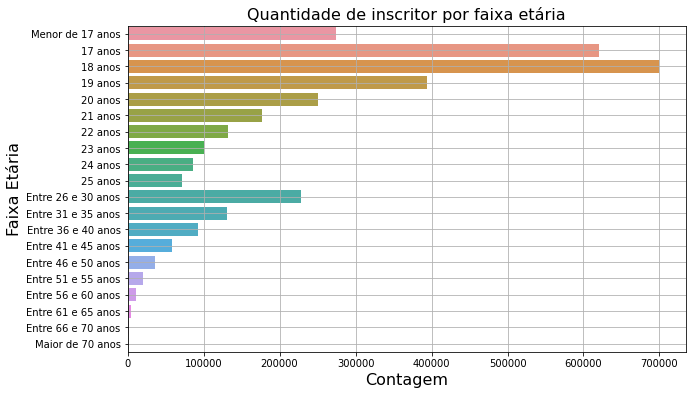

In [12]:
plt.figure(figsize=(10,6))
sns.countplot(y= df2['TP_FAIXA_ETARIA'],order=['Menor de 17 anos','17 anos','18 anos','19 anos','20 anos','21 anos',
            '22 anos','23 anos','24 anos','25 anos','Entre 26 e 30 anos',
            'Entre 31 e 35 anos','Entre 36 e 40 anos','Entre 41 e 45 anos',
            'Entre 46 e 50 anos','Entre 51 e 55 anos','Entre 56 e 60 anos',
            'Entre 61 e 65 anos','Entre 66 e 70 anos','Maior de 70 anos'])
plt.title('Quantidade de inscritor por faixa etária', fontsize = 16)
plt.xlabel('Contagem',fontsize=16)
plt.ylabel('Faixa Etária', fontsize = 16)
plt.grid(True)
plt.show()
#plt.legend(['Menor de 17 anos','17 anos','18 anos','19 anos','20 anos','21 anos',
#            '22 anos','23 anos','24 anos','25 anos','Entre 26 e 30 anos',
#            'Entre 31 e 35 anos','Entre 36 e 40 anos','Entre 41 e 45 anos',
#            'Entre 46 e 50 anos','Entre 51 e 55 anos','Entre 56 e 60 anos',
#            'Entre 61 e 65 anos','Entre 66 e 70 anos','Maior de 70 anos'])

<div align = 'justify'>

Como era de se esperar, a grande maioria dos candidadatos do ENEM 2021 encontram-se na faixa etária dos que estão finalizando ou que finalizaram a pouco tempo o ensino médio. Isso justifica-se pelo fato de que, desde 2009 o exame passou a ser a porta de entrada para universidades federais por todo o país, além dos programas de bolsas e financiamentos estudantis que fazem uso das provas do ENEM (ProUni, Fies).

</div>

In [13]:
#Treineiros
df2['IN_TREINEIRO'].value_counts(normalize=True)

0    0.871029
1    0.128971
Name: IN_TREINEIRO, dtype: float64

Do total de inscritos, 12,9% fizeram a prova como treineiros, ou seja, fizeram a prova apenas com o intuito de treinar seus conhecimentos. 

In [14]:
dict_estcivil = {
    0:'não informado',
    1: 'Solteiro(a)',
    2: 'Casado(a)/Mora com companheiro(a)',
    3: 'Divorciado(a)/Desquitado(a)/Separado(a)',
    4: 'Viúvo'
}

dict_cor = {
    0:'Não declarado',
    1: 'Branca',
    2: 'Preta',
    3: 'Parda',
    4: 'Amarela',
    5: 'Indígena',
    6: 'Não dispõe da informação'
}

df2['TP_ESTADO_CIVIL'] = df2['TP_ESTADO_CIVIL'].map(dict_estcivil)
df2['TP_COR_RACA'] = df2['TP_COR_RACA'].map(dict_cor)

<ipython-input-14-401b4d64b187>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['TP_ESTADO_CIVIL'] = df2['TP_ESTADO_CIVIL'].map(dict_estcivil)
<ipython-input-14-401b4d64b187>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['TP_COR_RACA'] = df2['TP_COR_RACA'].map(dict_cor)


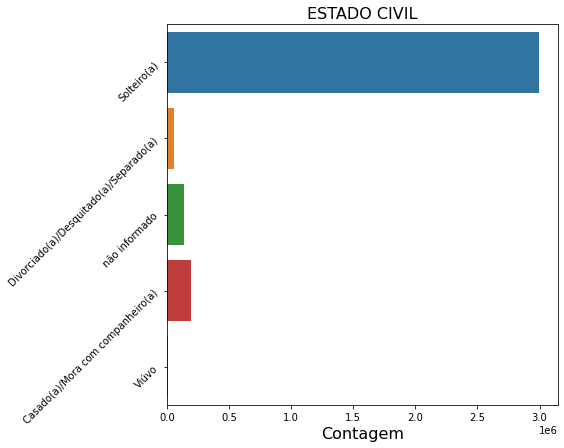

Solteiro(a)                                0.884
Casado(a)/Mora com companheiro(a)          0.058
não informado                              0.041
Divorciado(a)/Desquitado(a)/Separado(a)    0.016
Viúvo                                      0.001
Name: TP_ESTADO_CIVIL, dtype: float64

In [15]:
#Distribuição de candidatos por estado civil
plt.figure(figsize=(7,7))
sns.countplot(y = df2['TP_ESTADO_CIVIL'])
plt.title('ESTADO CIVIL',fontsize = 16)
plt.xlabel('Contagem',fontsize = 16)
plt.ylabel('',fontsize = 16)
plt.yticks(rotation=45)
plt.show()

round(df2['TP_ESTADO_CIVIL'].value_counts(normalize=True),3)

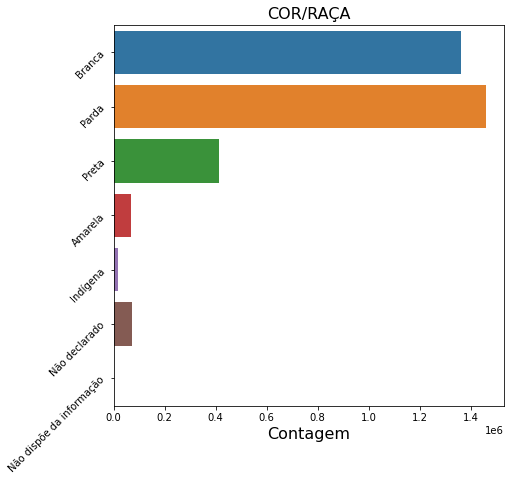

Parda                       0.430
Branca                      0.402
Preta                       0.121
Não declarado               0.021
Amarela                     0.020
Indígena                    0.006
Não dispõe da informação    0.000
Name: TP_COR_RACA, dtype: float64

In [16]:
#Distribuição de candidatos por cor/raça
plt.figure(figsize=(7,7))
sns.countplot(y = df2['TP_COR_RACA'])
plt.title('COR/RAÇA',fontsize = 16)
plt.xlabel('Contagem',fontsize = 16)
plt.ylabel('',fontsize = 16)
plt.yticks(rotation=45)
plt.show()

round(df2['TP_COR_RACA'].value_counts(normalize=True),3)

In [17]:
dict_tipo_escola = {
    1: 'Não informado',
    2: 'Pública',
    3: 'Privada'
}

df2['TP_ESCOLA'] = df2['TP_ESCOLA'].map(dict_tipo_escola)

<ipython-input-17-7487afc35aaf>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['TP_ESCOLA'] = df2['TP_ESCOLA'].map(dict_tipo_escola)


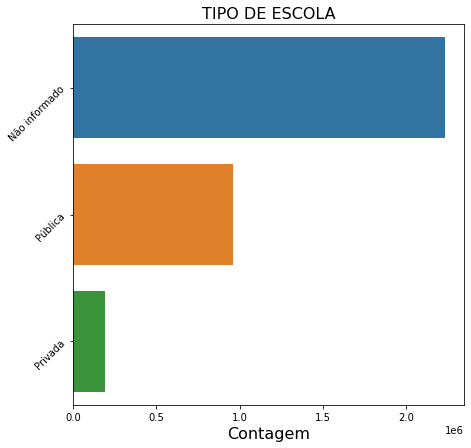

Não informado    0.660
Pública          0.283
Privada          0.057
Name: TP_ESCOLA, dtype: float64

In [18]:
#Distribuição de candidatos por tipo de escola (publico/privado)
plt.figure(figsize=(7,7))
sns.countplot(y = df2['TP_ESCOLA'])
plt.title('TIPO DE ESCOLA',fontsize = 16)
plt.xlabel('Contagem',fontsize = 16)
plt.ylabel('',fontsize = 16)
plt.yticks(rotation=45)
plt.show()

round(df2['TP_ESCOLA'].value_counts(normalize=True),3)

Infelizmente, 66% dos inscritos não informaram o tipo de escola que frequentaram. Do total, 28,3% declararam que frequentaram escola pública e apenas 5,7% declararam ter estudado em escola particular.

É possível que esta informação tenha sido absorvida na coluna que diz respeito à esfera administrativa da escola do candidato. Vejamos...

In [19]:
dict_esfera_administrativa = {
1: 'Federal',
2: 'Estadual',
3: 'Municipal',
4: 'Privada'
}

df2['TP_DEPENDENCIA_ADM_ESC'] = df2['TP_DEPENDENCIA_ADM_ESC'].map(dict_esfera_administrativa)

<ipython-input-19-51f66b5ab018>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['TP_DEPENDENCIA_ADM_ESC'] = df2['TP_DEPENDENCIA_ADM_ESC'].map(dict_esfera_administrativa)


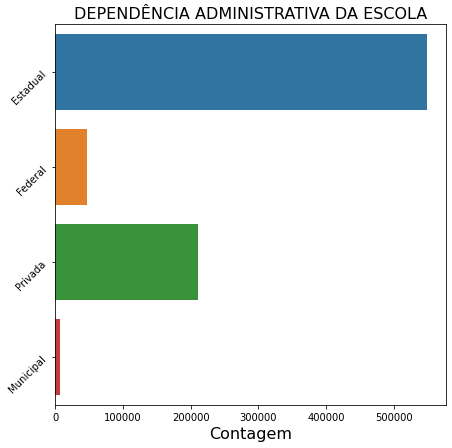

Estadual     0.675
Privada      0.259
Federal      0.057
Municipal    0.009
Name: TP_DEPENDENCIA_ADM_ESC, dtype: float64

In [19]:
#Distribuição de candidatos por esfera administrativa da escola (Federal,Estadual,Municipal e Privada)
plt.figure(figsize=(7,7))
sns.countplot(y = df2['TP_DEPENDENCIA_ADM_ESC'])
plt.title('DEPENDÊNCIA ADMINISTRATIVA DA ESCOLA',fontsize = 16)
plt.xlabel('Contagem',fontsize = 16)
plt.ylabel('',fontsize = 16)
plt.yticks(rotation=45)
plt.show()

round(df2['TP_DEPENDENCIA_ADM_ESC'].value_counts(normalize=True),3)


Agora sim temos uma noção melhor sobre o tipo de escola que os candidatos frequentaram. Dos 5,7% que declararam terem estudado em escolas privadas no item anterior, temos que este número agora é de 25,9%, deixando 74,1% para alunos de escolas públicas (federais, estaduais e municipais).

## Análise dos candidatos presentes nos dois dias

Para selecionar os candidatos que estiveram presente nos dois dias e, consequentemente, fizeram as quatro provas(CH,LC,CN,MT) e a redação, vamos selecionar candidatos cujo status nas respectivas colunas seja igual a 1. Dado que, de acordo com o dicionário, 0 significa **ausente** e 2 significa **eliminado**.


In [21]:
df2['TP_PRESENCA_CH'].value_counts()

1    2378379
0    1007397
2       4056
Name: TP_PRESENCA_CH, dtype: int64

In [22]:
df_p = df2[(df2['TP_PRESENCA_CN'] == 1) & (df2['TP_PRESENCA_CH'] == 1) & (df2['TP_PRESENCA_LC'] == 1) & (df2['TP_PRESENCA_MT'] == 1)]
df_p.head()

,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,...,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
1,Entre 31 e 35 anos,M,Solteiro(a),Branca,1,1,11,Não informado,NaN,0,...,551.8,498.3,461.5,1.0,120.0,120.0,120.0,120.0,80.0,560.0
3,18 anos,M,Solteiro(a),Parda,1,2,0,Pública,1.0,0,...,678.9,638.9,659.5,1.0,120.0,180.0,120.0,200.0,160.0,780.0
4,17 anos,F,Solteiro(a),Parda,1,2,0,Pública,1.0,0,...,532.4,457.6,582.6,1.0,120.0,140.0,160.0,180.0,180.0,780.0
8,23 anos,F,Solteiro(a),Parda,1,2,0,Pública,NaN,0,...,476.5,450.7,493.4,1.0,120.0,120.0,80.0,100.0,100.0,520.0
9,19 anos,F,Solteiro(a),Parda,1,2,0,Pública,1.0,0,...,539.2,494.6,413.3,1.0,80.0,120.0,80.0,80.0,20.0,380.0


In [23]:
#Verificando o formato do dataframe resultante
df_p.shape

(2238107, 31)

Para aliviar a memória do sistema, vamos deletar os dataframes usados anteriormente e ficar exclusivamente com o dataframe dos candidatos presentes a partir de agora.

In [24]:
del df
del df2

In [25]:
df_p.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2238107 entries, 1 to 3389830
Data columns (total 31 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   TP_FAIXA_ETARIA         object 
 1   TP_SEXO                 object 
 2   TP_ESTADO_CIVIL         object 
 3   TP_COR_RACA             object 
 4   TP_NACIONALIDADE        int64  
 5   TP_ST_CONCLUSAO         int64  
 6   TP_ANO_CONCLUIU         int64  
 7   TP_ESCOLA               object 
 8   TP_ENSINO               float64
 9   IN_TREINEIRO            int64  
 10  NO_MUNICIPIO_ESC        object 
 11  CO_UF_ESC               float64
 12  SG_UF_ESC               object 
 13  TP_DEPENDENCIA_ADM_ESC  object 
 14  TP_LOCALIZACAO_ESC      float64
 15  TP_SIT_FUNC_ESC         float64
 16  TP_PRESENCA_CN          int64  
 17  TP_PRESENCA_CH          int64  
 18  TP_PRESENCA_LC          int64  
 19  TP_PRESENCA_MT          int64  
 20  NU_NOTA_CN              float64
 21  NU_NOTA_CH              float64

Agora vamos fazer histogramas com as distribuições das notas de Liguagem e códigos, Matemática, Ciências humanas e Ciências da Natureza.

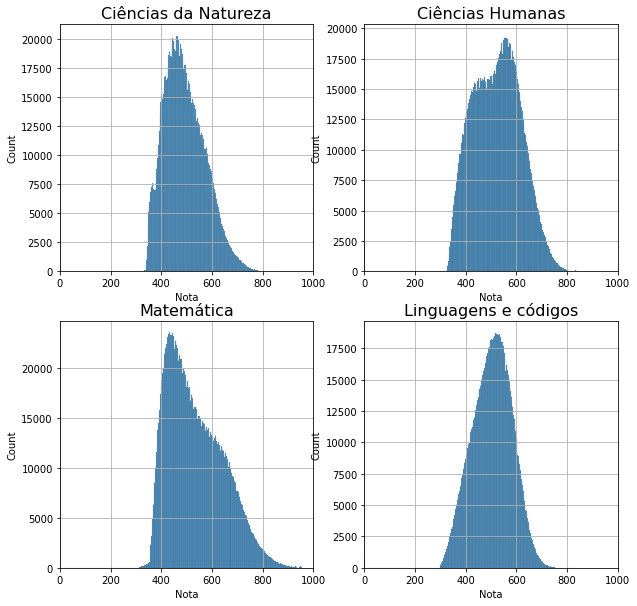

In [26]:
plt.figure(figsize=(10,10))
plt.title('NOTAS DAS QUATRO PROVAS')
plt.subplot(2,2,1)
sns.histplot(x = df_p['NU_NOTA_CN'])
plt.xlabel('Nota')
plt.xlim([0,1000])
plt.grid(True)
plt.title('Ciências da Natureza',fontsize=16)

plt.subplot(2,2,2)
sns.histplot(x = df_p['NU_NOTA_CH'])
plt.xlabel('Nota')
plt.xlim([0,1000])
plt.title('Ciências Humanas',fontsize=16)
plt.grid(True)

plt.subplot(2,2,3)
sns.histplot(x = df_p['NU_NOTA_MT'])
plt.xlabel('Nota')
plt.xlim([0,1000])
plt.grid(True)
plt.title('Matemática',fontsize=16)

plt.subplot(2,2,4)
sns.histplot(x = df_p['NU_NOTA_LC'])
plt.xlabel('Nota')
plt.xlim([0,1000])
plt.title('Linguagens e códigos',fontsize=16)
plt.grid(True)

plt.show()



In [27]:
df_p.groupby(['TP_DEPENDENCIA_ADM_ESC'])['NU_NOTA_CN','NU_NOTA_MT','NU_NOTA_CH','NU_NOTA_LC'].mean()

# O mesmo resultado acima pode ser obtido com uma pivot table
#table = pd.pivot_table(df_p,values=['NU_NOTA_CN','NU_NOTA_MT','NU_NOTA_CH','NU_NOTA_LC'],index=['TP_DEPENDENCIA_ADM_ESC'],aggfunc = np.mean)
#table

<ipython-input-27-1b1c9f048298>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_p.groupby(['TP_DEPENDENCIA_ADM_ESC'])['NU_NOTA_CN','NU_NOTA_MT','NU_NOTA_CH','NU_NOTA_LC'].mean()


,NU_NOTA_CN,NU_NOTA_MT,NU_NOTA_CH,NU_NOTA_LC
TP_DEPENDENCIA_ADM_ESC,,,,
Estadual,464.019468,502.559888,492.744045,480.778366
Federal,531.647300,599.432620,567.340799,543.505746
Municipal,475.947207,521.442767,506.620749,492.462595
Privada,538.450762,607.110279,567.108973,545.721261


Na tabela acima vemos que a rede privada possui as melhores notas em praticamente todas as provas, com exceção da prova de ciências humanas que é praticamente igual à do nível federal.

Por fim, vamos avaliar as notas das redações geral e por rede de ensino.

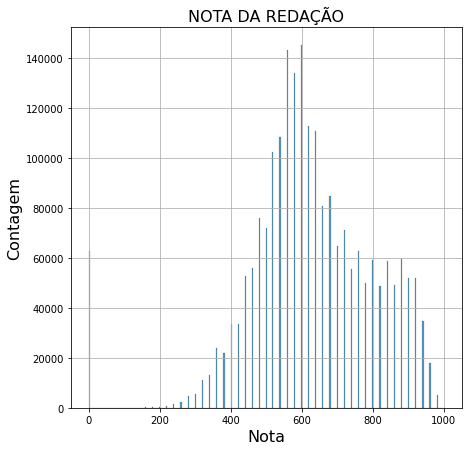

In [28]:
plt.figure(figsize=(7,7))
plt.title('NOTA DA REDAÇÃO',fontsize=16)
sns.histplot(x = df_p['NU_NOTA_REDACAO'])
plt.xlabel('Nota',fontsize = 16)
plt.ylabel('Contagem',fontsize = 16)
plt.grid(True)


plt.show()

In [29]:
#Tabela com o resumo das notas da redação por rede de ensino
print(df_p.groupby(['TP_DEPENDENCIA_ADM_ESC'])['NU_NOTA_REDACAO'].mean())
print('\n')
print((df_p['NU_NOTA_REDACAO'] == 1000).sum(),' redações atingiram a nota 1000 (mil)')



TP_DEPENDENCIA_ADM_ESC
Estadual     563.202694
Federal      700.532898
Municipal    578.788623
Privada      730.505273
Name: NU_NOTA_REDACAO, dtype: float64


21  redações atingiram a nota 1000 (mil)


In [33]:
df_redacao1000 = df_p[df_p['NU_NOTA_REDACAO'] == 1000]
df_redacao1000

,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,...,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
10068,18 anos,F,Solteiro(a),Parda,1,2,0,Privada,1.0,0,...,741.9,676.1,788.1,1.0,200.0,200.0,200.0,200.0,200.0,1000.0
77754,17 anos,M,Solteiro(a),Branca,1,2,0,Privada,1.0,0,...,731.5,647.1,803.7,1.0,200.0,200.0,200.0,200.0,200.0,1000.0
129842,Menor de 17 anos,F,Solteiro(a),Branca,1,3,0,Não informado,NaN,1,...,630.3,599.3,638.2,1.0,200.0,200.0,200.0,200.0,200.0,1000.0
175279,20 anos,F,Solteiro(a),Branca,1,1,2,Não informado,NaN,0,...,752.5,682.2,878.0,1.0,200.0,200.0,200.0,200.0,200.0,1000.0
248838,20 anos,F,Solteiro(a),Branca,1,1,3,Não informado,NaN,0,...,765.9,704.1,758.3,1.0,200.0,200.0,200.0,200.0,200.0,1000.0
301089,20 anos,F,Solteiro(a),Branca,1,1,3,Não informado,NaN,0,...,694.8,651.6,791.8,1.0,200.0,200.0,200.0,200.0,200.0,1000.0
334470,18 anos,F,Solteiro(a),Branca,1,2,0,Privada,1.0,0,...,735.2,668.3,935.0,1.0,200.0,200.0,200.0,200.0,200.0,1000.0
564673,20 anos,F,Solteiro(a),Branca,1,1,3,Não informado,NaN,0,...,715.6,664.2,803.6,1.0,200.0,200.0,200.0,200.0,200.0,1000.0
604348,19 anos,M,Solteiro(a),Branca,1,1,2,Não informado,NaN,0,...,800.4,779.8,944.1,1.0,200.0,200.0,200.0,200.0,200.0,1000.0
725913,18 anos,F,Solteiro(a),Branca,1,2,0,Pública,1.0,0,...,768.7,739.9,887.7,1.0,200.0,200.0,200.0,200.0,200.0,1000.0


In [36]:
df_p['TP_DEPENDENCIA_ADM_ESC'].isnull().sum()

1635656

# Conclusões

Dos resultados mostrados nesta análise exploratória podemos ver as distribuições de notas dos quatro tipos de provas e da redação de cada aluno. Vimos que as escolas da rede privada lideram o ranking de escolas com maiores notas, seguido pela rede federal. Este resultado deve servir de alerta aos governos estaduais pois, aparentemente, a rede estadual é a pior entre as quatro redes existentes. 